# HOUSING PRICE PREDICTION AND MARKET SEGMENTATION IN KUALA LUMPURE

### IMPORTING DEPENDACIES

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### DATA CLEANING & PREPROCESSING

1. loading dataset


In [72]:
#load the dataset
df = pd.read_csv("data/housing_data.csv")

#display the first few rows
df.head(20)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


#### Check structure and missing value

In [73]:
#dataset info
df.info()

#summary of data
df.describe()

#checking null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

#### Checking & Extracting Size in Square Feet

The 'Size' column has values like "Built-up : 1,335 sq. ft.". We extract just the numeric part (e.g., 1335) to use it as a numerical feature for modeling.

In [74]:
print(df['Size'].describe())

count                         52820
unique                         6190
top       Land area : 22x75 sq. ft.
freq                            615
Name: Size, dtype: object


In [75]:
print(df['Size'].head())

0    Built-up : 1,335 sq. ft.
1    Land area : 6900 sq. ft.
2    Built-up : 1,875 sq. ft.
3                         NaN
4    Built-up : 1,513 sq. ft.
Name: Size, dtype: object


In [76]:
#cleaning the size column

def clean_size(value):
    if pd.isna(value):
        return np.nan

    value = str(value)  # Ensure it's a string

    # Case 1: 'Built-up : 1,875 sq. ft.'
    match = re.search(r'(\d{1,3}(?:,\d{3})+|\d+(\.\d+)?)\s*sq\.?\s*ft', value)
    if match:
        return float(match.group(1).replace(',', ''))

    # Case 2: '22 x 80 sq. ft.' or '20x75 sq. ft.'
    match = re.search(r'(\d+)\s*[xX]\s*(\d+)', value)
    if match:
        return int(match.group(1)) * int(match.group(2))

    return np.nan

# Apply cleaning
df['Size'] = df['Size'].apply(clean_size)

# Check result
print(df['Size'].describe())


count    5.253100e+04
mean     2.684517e+03
std      4.927622e+04
min      0.000000e+00
25%      8.800000e+02
50%      1.259000e+03
75%      2.195000e+03
max      1.100000e+07
Name: Size, dtype: float64


#### Cleaning the 'Price' Column

The 'Price' column includes currency symbols and commas (e.g., "RM 1,200,000"). These need to be removed so we can convert the column into a numeric format suitable for regression.


In [77]:
# ---- Clean Price ----

df['Price'] = df['Price'].astype(str).str.replace(r"[^\d.]", "", regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])


#### Handling the 'Rooms' Column

The 'Rooms' column contains entries like "2+1" (which means 2 rooms + 1 small room) or "Studio". We process these entries by summing the parts or assigning 1 room for studio apartments. This standardizes the data for numeric modeling.

In [78]:
# ---- Clean Rooms ----
df['Rooms'] = df['Rooms'].astype(str).str.extract(r'(\d+)')
df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
#fill null values
df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)


C:\Users\modou\AppData\Local\Temp\ipykernel_19208\1872575544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rooms'].fillna(df['Rooms'].mode()[0], inplace=True)


#### Handling Missing Values

Missing values in numerical columns like 'Bathrooms', 'Car Parks', and 'Size' are filled using the median. Rows with missing target values ('Price') are dropped, as they can't be used for training the model.

In [79]:
# Convert relevant columns to numeric
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Car Parks'] = pd.to_numeric(df['Car Parks'], errors='coerce')

# Fill missing values
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Car Parks'] = df['Car Parks'].fillna(0)

# Handle missing values in categorical columns
df['Furnishing'] = df['Furnishing'].fillna('Unknown')
df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])

# Drop rows where target variable 'Price' is missing
df = df.dropna(subset=['Price'])

In [80]:
# Convert Bathrooms and Car Parks to integers
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Car Parks'] = df['Car Parks'].astype(int)
df['Rooms'] = df['Rooms'].astype(int) 

In [81]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium (Corner),1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium (Corner),1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished


#### Inspecting 'Location' Column

In [82]:
#checking unique values
print(df['Location'].nunique()) 
print(df['Location'].value_counts().head(60))


111
Location
Mont Kiara, Kuala Lumpur                           5862
KLCC, Kuala Lumpur                                 5216
Cheras, Kuala Lumpur                               4483
Jalan Klang Lama (Old Klang Road), Kuala Lumpur    2845
Setapak, Kuala Lumpur                              2699
Bukit Jalil, Kuala Lumpur                          2587
Kepong, Kuala Lumpur                               2266
Bangsar, Kuala Lumpur                              1885
Desa ParkCity, Kuala Lumpur                        1530
Damansara Heights, Kuala Lumpur                    1402
Dutamas, Kuala Lumpur                              1243
Ampang, Kuala Lumpur                               1227
Sentul, Kuala Lumpur                               1145
Sungai Besi, Kuala Lumpur                          1119
Taman Tun Dr Ismail, Kuala Lumpur                  1078
Sri Hartamas, Kuala Lumpur                         1060
Taman Desa, Kuala Lumpur                           1021
Wangsa Maju, Kuala Lumpur          

In [83]:
# Remove extra spaces
df['Location'] = df['Location'].str.strip()

#  Extract area only (before comma)
df['Area'] = df['Location'].str.split(',').str[0].str.strip()

location_count = df['Area'].value_counts()
top_areas = location_count[location_count > 100].index
df['Area'] = df['Area'].apply(lambda x: x if x in top_areas else 'other') 


In [84]:
print(df['Area'].value_counts().head(60)) 

Area
Mont Kiara                           5862
KLCC                                 5216
Cheras                               4483
Jalan Klang Lama (Old Klang Road)    2845
Setapak                              2699
Bukit Jalil                          2587
Kepong                               2266
Bangsar                              1885
Desa ParkCity                        1530
Damansara Heights                    1402
Dutamas                              1243
Ampang                               1227
Sentul                               1145
Sungai Besi                          1119
Taman Tun Dr Ismail                  1078
Sri Hartamas                         1060
Taman Desa                           1021
Wangsa Maju                           967
Segambut                              898
Bukit Bintang                         845
KL City                               773
Kuchai Lama                           771
Sri Petaling                          726
Jalan Kuching                

#### Inspecting 'Property Type' Column

In [85]:
#checking unique values
print(df['Property Type'].nunique())
print(df['Property Type'].value_counts().head(60))  

98
Property Type
Condominium                                  11483
Serviced Residence                            7183
Condominium (Corner)                          5710
Condominium (Intermediate)                    5122
Serviced Residence (Intermediate)             3262
2-sty Terrace/Link House (Intermediate)       2438
Serviced Residence (Corner)                   2371
Bungalow                                      1732
2-sty Terrace/Link House                      1041
Bungalow (Intermediate)                        944
3-sty Terrace/Link House (Intermediate)        935
Semi-detached House (Intermediate)             905
Semi-detached House                            844
Bungalow (Corner)                              694
Apartment                                      690
Apartment (Intermediate)                       671
1-sty Terrace/Link House (Intermediate)        496
Residential Land                               475
2-sty Terrace/Link House (Corner)              474
2.5-sty Terrac

In [86]:

# Remove anything in parentheses
df['Property Type'] = df['Property Type'].apply(lambda x: re.sub(r'\s*\(.*?\)', '', x).strip())

# Combine similar types 
df['Property Type'] = df['Property Type'].replace({
    'Serviced Residence': 'Serviced Residence',
    'Apartment': 'Apartment',
    'Flat': 'Apartment',
    'Condominium': 'Condominium',
    'Townhouse': 'Townhouse',
    'Bungalow': 'Bungalow',
    'Residential Land': 'Land',
    'Bungalow Land': 'Land',
    'Semi-detached House': 'Semi-detached House',
    'Terrace/Link House': 'Terrace House',
    '1-sty Terrace/Link House': 'Terrace House',
    '2-sty Terrace/Link House': 'Terrace House',
    '2.5-sty Terrace/Link House': 'Terrace House',
    '3-sty Terrace/Link House': 'Terrace House',
    '3.5-sty Terrace/Link House': 'Terrace House',
    '4-sty Terrace/Link House': 'Terrace House',
    '1.5-sty Terrace/Link House': 'Terrace House',
})

# Re-count
property_type_counts = df['Property Type'].value_counts()

# Group rare ones under 'Other' (e.g., if count < 100)
common_types = property_type_counts[property_type_counts > 100].index
df['Property Type'] = df['Property Type'].apply(lambda x: x if x in common_types else 'Other')


In [87]:
print(df['Property Type'].value_counts().head(12))

Property Type
Condominium            23218
Serviced Residence     13413
Terrace House           7773
Bungalow                3430
Semi-detached House     2152
Apartment               2048
Land                    1022
Townhouse                548
Other                     31
Name: count, dtype: int64


C:\Users\modou\AppData\Local\Temp\ipykernel_19208\2868761514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x= 'Property Type', order = df['Property Type'].value_counts().index,palette='viridis')


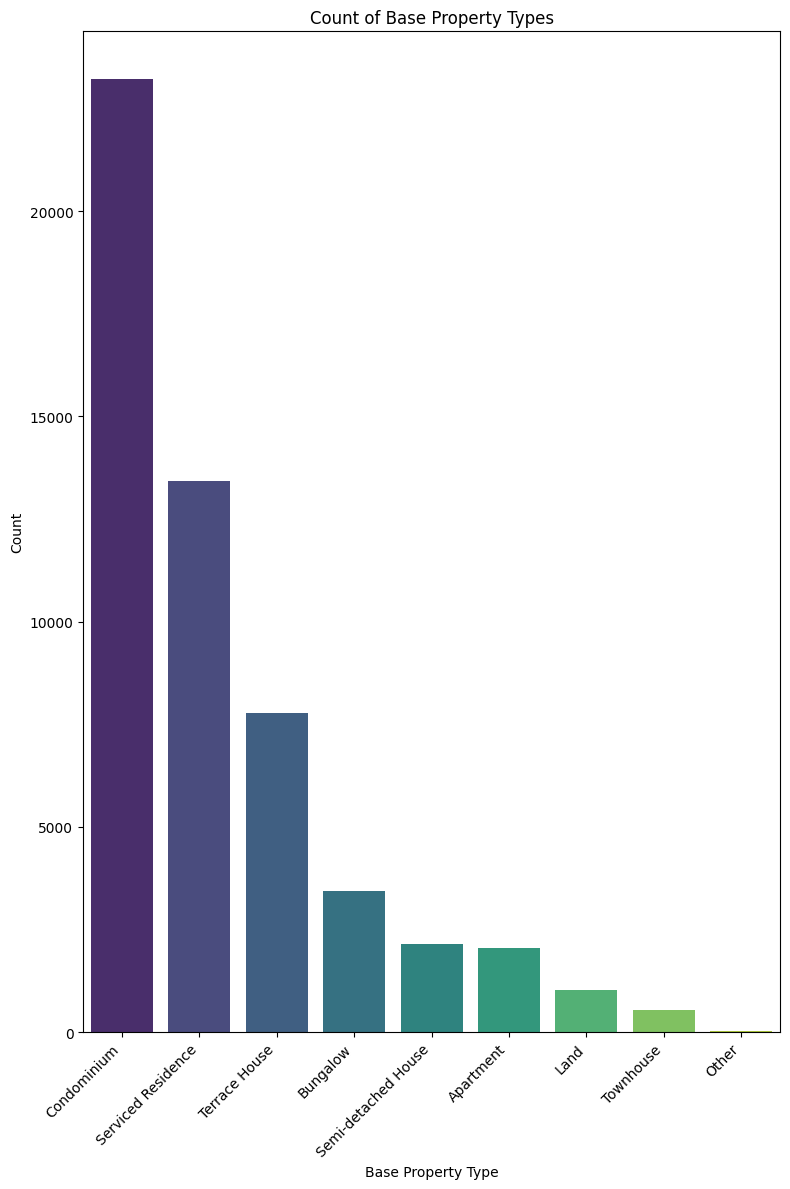

In [88]:
# Count of each base property type
plt.figure(figsize=(8,12))
sns.countplot(data = df,x= 'Property Type', order = df['Property Type'].value_counts().index,palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Base Property Types')
plt.xlabel('Base Property Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [89]:
df.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished,KLCC
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished,Damansara Heights
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium,1875.0,Partly Furnished,Dutamas
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium,1513.0,Partly Furnished,Bukit Jalil
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished,Taman Tun Dr Ismail
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4,4,Semi-detached House,3600.0,Partly Furnished,Taman Tun Dr Ismail
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4,4,3,Terrace House,75.0,Partly Furnished,Taman Tun Dr Ismail
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2,1,Apartment,904.0,Partly Furnished,Sri Petaling
11,"Taman Tun Dr Ismail, Kuala Lumpur",1680000.0,4,3,0,Terrace House,80.0,Partly Furnished,Taman Tun Dr Ismail
12,"Taman Tun Dr Ismail, Kuala Lumpur",1700000.0,3,3,0,Terrace House,1900.0,Partly Furnished,Taman Tun Dr Ismail


### FEATURE ENGINEERING & EXPLORATORY DATA ANALYSIS (EDA)

checking the 'price column'

In [90]:
# discription of the 'Price' column
df['Price'].describe().apply(lambda x: f"{x:,.2f}")

count           53,635.00
mean         2,091,946.86
std         13,840,138.45
min                 10.00
25%            580,000.00
50%            990,000.00
75%          1,996,400.00
max      1,980,000,000.00
Name: Price, dtype: object

The mean price is around 2 million, but the standard deviation is extremely large (~13.8 million), indicating high variance in property prices.
The maximum price is almost 2 billion, which is might be data error because in KL a property price does not reach billion. The range of House price in kl is "RM 25,000"  to "30,000,000" we will consider any value out of this range as error



In [91]:
#Remove extremely low or invalid prices
## Keep prices between RM 100000 and RM 30,000,000

df2 = df[(df['Price'] >= 100000) & (df['Price'] <= 10000000)]
df2.shape


(52226, 9)

In [92]:
#check skew
df2['Price'].skew()

2.343720667219638

A skewness value greater than 1 indicates a highly right-skewed distribution.

In our case, a skewness of 4.18 suggests that a large number of properties are priced on the lower end, while a small number are extremely expensive.

This level of skew can impact regression models that assume normally distributed target variables.

Text(0.5, 0, 'Price(RM)')

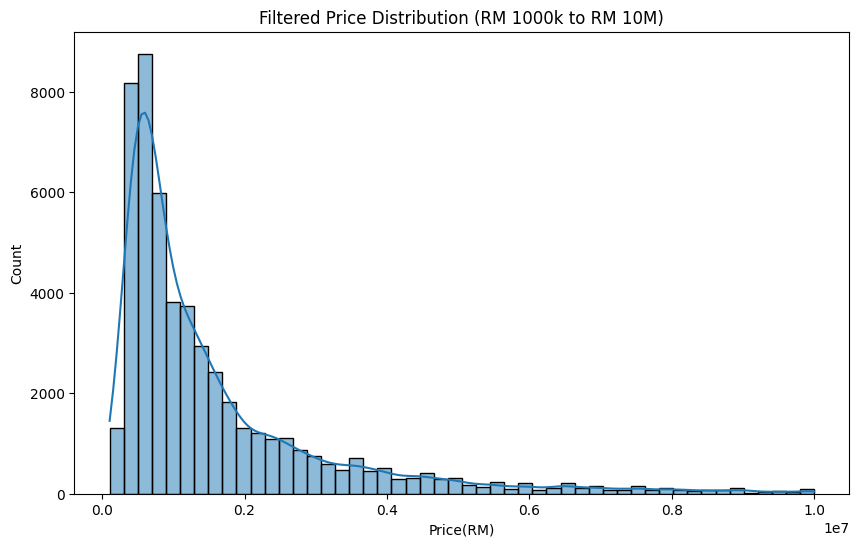

In [93]:
#distribution of the filtered price to see how it is skewed
plt.figure(figsize=(10,6))
sns.histplot(df2['Price'],bins = 50, kde = True)
plt.title("Filtered Price Distribution (RM 1000k to RM 10M)")
plt.xlabel("Price(RM)")

In [94]:
#log transformation price to handle skewness
df2.loc[:, 'log_price'] = np.log1p(df2['Price'])
print(df2['log_price'].skew()) 


0.4589324796247195


C:\Users\modou\AppData\Local\Temp\ipykernel_19208\1236509923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'log_price'] = np.log1p(df2['Price'])


To reduce skewness in the Price column and stabilize variance, we applied a log transformation using np.log1p(). This technique is useful when data is heavily right-skewed, as it compresses the range of large values.

Text(0.5, 0, 'Price (RM)')

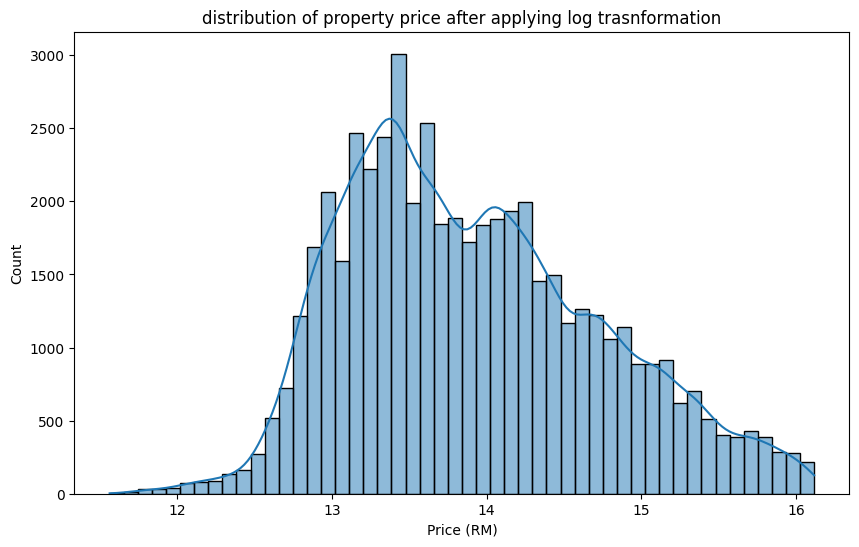

In [95]:
#viuslizing the price after transformation
plt.figure(figsize = (10,6))
sns.histplot(df2['log_price'],bins = 50, kde = True)
plt.title('distribution of property price after applying log trasnformation')
plt.xlabel('Price (RM)') 

In [96]:
#checking the 'size' column for oulier
df2['Size'].describe().apply(lambda x: f"{x:,.2f}") 

count        52,226.00
mean          2,302.28
std          48,915.73
min               0.00
25%             885.00
50%           1,259.00
75%           2,039.50
max      11,000,000.00
Name: Size, dtype: object

The mean (2,532.56) is much higher than the median (1,259.00), indicating a right-skewed distribution.

The maximum value of 11,000,000 is unusually high and likely an outlier or a data entry error.

The minimum value is 0, which may also be invalid depending on the context (e.g., size should not be)

####  Filtering Outliers in House Size

In [97]:
#removing size = 0
df2 = df2[df2['Size'] > 0] 

In [98]:
# Filter the data to include properties with size between 400 and 10000
df3 = df2[(df['Size'] >= 400) & (df['Size'] <= 10000)]
df3.shape  


C:\Users\modou\AppData\Local\Temp\ipykernel_19208\2358168097.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df['Size'] >= 400) & (df['Size'] <= 10000)]


(45748, 10)

To improve data quality and model performance, we filter the Size feature to remove unrealistic values.
Sizes below 400 square feet are likely to be studio apartments or invalid entries.
Sizes above 10,000 square feet are extremely rare and may represent commercial properties, mansions, or data errors.

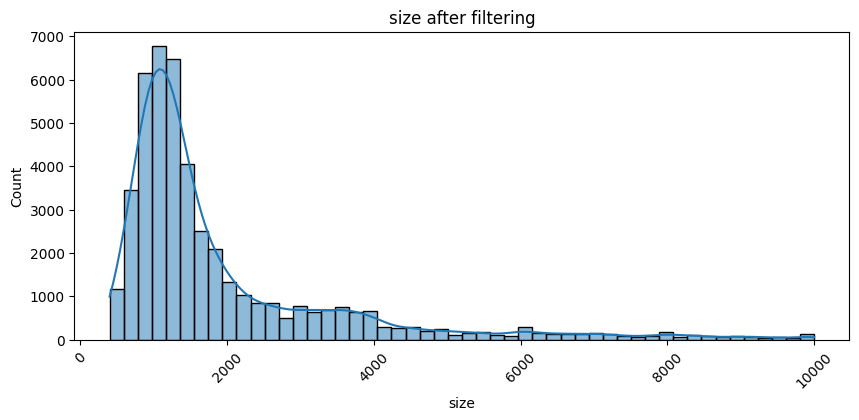

In [99]:
# visualizing to see how the size column is skew
plt.figure(figsize=(10, 4))
sns.histplot(df3['Size'],bins= 50,kde = True)
plt.xticks(rotation=45)
plt.title('size after filtering')
plt.xlabel('size')
plt.show() 


In [100]:
#appying log to reduce the outlier
df3['log_size'] = np.log1p(df3['Size'])

C:\Users\modou\AppData\Local\Temp\ipykernel_19208\1758983394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_size'] = np.log1p(df3['Size'])


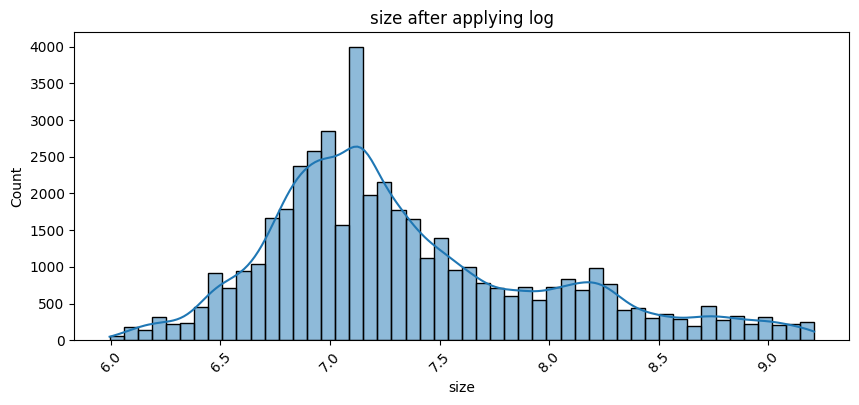

In [101]:
#after appllying log transformation
plt.figure(figsize=(10, 4))
sns.histplot(df3['log_size'],bins= 50,kde = True)
plt.xticks(rotation=45)
plt.title('size after applying log')
plt.xlabel('size')
plt.show()

In [102]:
##checking the 'Bathroom' column for oulier
df3['Bathrooms'].describe().apply(lambda x: f"{x:,.2f}")

count    45,748.00
mean          2.89
std           1.50
min           1.00
25%           2.00
50%           2.00
75%           4.00
max          20.00
Name: Bathrooms, dtype: object

In [103]:
#checking 'rooms'
df3['Rooms'].describe().apply(lambda x: f"{x:,.2f}")

count    45,748.00
mean          3.11
std           1.16
min           1.00
25%           3.00
50%           3.00
75%           4.00
max          18.00
Name: Rooms, dtype: object

In [104]:
#checking the ''
df3['Car Parks'].describe().apply(lambda x: f"{x:,.2f}")

count    45,748.00
mean          1.33
std           1.25
min           0.00
25%           0.00
50%           1.00
75%           2.00
max          30.00
Name: Car Parks, dtype: object

To ensure a cleaner dataset and minimize the impact of outliers, we applied filters to retain only typical residential properties:

Bathrooms ≤ 7

Rooms ≤ 8

Car Parks ≤ 6

These thresholds were chosen based on summary statistics and domain knowledge of typical Malaysian residential property structures.

In [105]:
#removing the unsual in this columns
df4 = df3[
    (df['Bathrooms'] <= 7) &
    (df['Rooms'] <= 8) &
    (df['Car Parks'] <= 6)
]
df4.head()

C:\Users\modou\AppData\Local\Temp\ipykernel_19208\2180063816.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area,log_price,log_size
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished,KLCC,14.038655,7.197435
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished,Damansara Heights,15.732433,8.839422
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium,1875.0,Partly Furnished,Dutamas,13.845070,7.536897
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium,1513.0,Partly Furnished,Bukit Jalil,13.710151,7.322510
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished,Taman Tun Dr Ismail,15.492607,8.881975


Check Correlation with Target (Price)

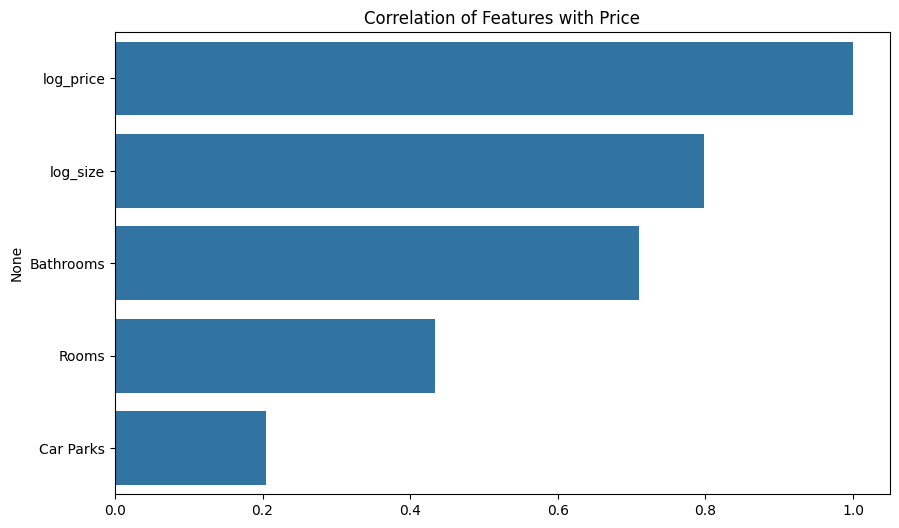

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Area
0,"KLCC, Kuala Lumpur",1250000.0,2,3,2,Serviced Residence,1335.0,Fully Furnished,KLCC
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7,0,Bungalow,6900.0,Partly Furnished,Damansara Heights
2,"Dutamas, Kuala Lumpur",1030000.0,3,4,2,Condominium,1875.0,Partly Furnished,Dutamas
4,"Bukit Jalil, Kuala Lumpur",900000.0,4,3,2,Condominium,1513.0,Partly Furnished,Bukit Jalil
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4,5,4,Bungalow,7200.0,Partly Furnished,Taman Tun Dr Ismail


In [106]:
# Drop original Price and Size
df5 = df4.drop(['Price', 'Size'], axis=1)
# Compute correlations with Price
correlation = df5.corr(numeric_only=True)['log_price'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation of Features with Price')
plt.show()
df.head()

the features 'Size','Birthrooms' and 'Rooms' are the main features that affect the price

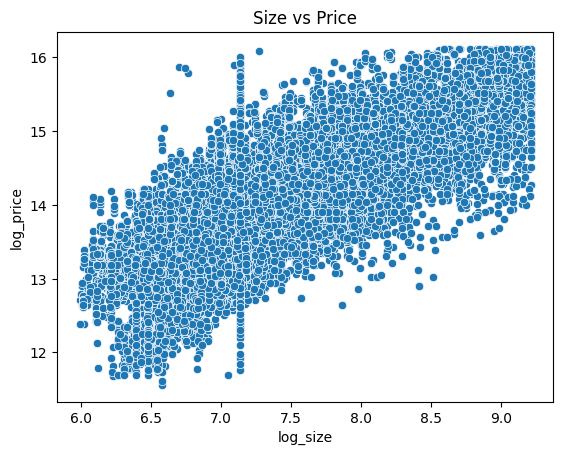

Index(['Location', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Furnishing', 'Area', 'log_price', 'log_size'],
      dtype='object')


In [107]:
# Size vs Price
sns.scatterplot(data=df5, x='log_size', y='log_price')
plt.title('Size vs Price')
plt.show()
print(df5.columns)

#### Boxplots for Categorical Features

In [108]:
# Check unique property types
print(df4["Property Type"].unique())

# Check unique areas
print(df4["Area"].unique())


['Serviced Residence' 'Bungalow' 'Condominium' 'Semi-detached House'
 'Apartment' 'Terrace House' 'Townhouse' 'Other' 'Land']
['KLCC' 'Damansara Heights' 'Dutamas' 'Bukit Jalil' 'Taman Tun Dr Ismail'
 'Sri Petaling' 'Bukit Tunku (Kenny Hills)' 'Mont Kiara' 'Desa ParkCity'
 'Bangsar South' 'Ampang Hilir' 'Jalan Klang Lama (Old Klang Road)'
 'KL City' 'Sungai Besi' 'KL Sentral' 'Setapak' 'City Centre'
 'Country Heights Damansara' 'Taman Desa' 'Sentul' 'Bangsar' 'Segambut'
 'Batu Caves' 'Wangsa Maju' 'Kepong' 'other' 'Cheras' 'Taman Melawati'
 'Setiawangsa' 'Ampang' 'Bukit Bintang' 'Sri Hartamas'
 'Jalan Sultan Ismail' 'Jalan Kuching' 'KL Eco City' 'Seputeh' 'Pantai'
 'Kuchai Lama' 'Bandar Menjalara' 'Jalan Ipoh' 'OUG' 'Brickfields'
 'Desa Pandan' 'Sunway SPK' 'Desa Petaling' 'Bandar Damai Perdana'
 'Keramat' 'Pandan Perdana' 'Salak Selatan' 'Titiwangsa']


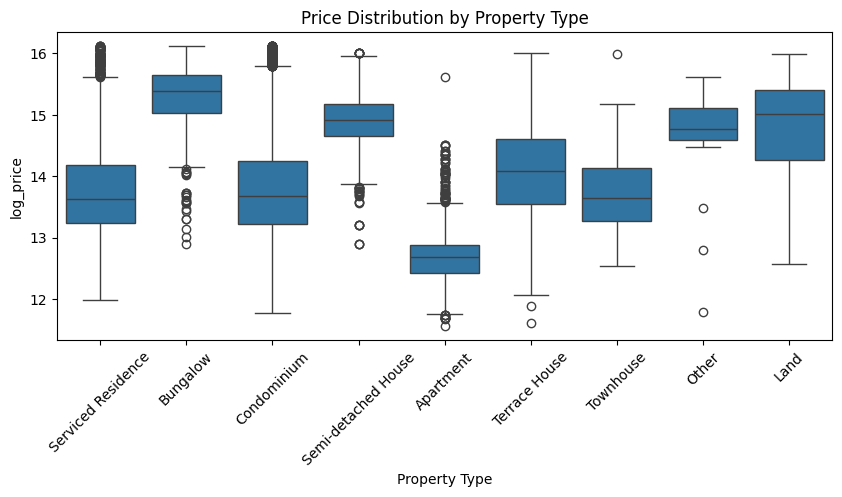

In [109]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df5, x='Property Type', y='log_price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Property Type')
plt.show()

## SUPERVISED (PRICE PREDICTION)

#### ENCODING CATEGORIAL FEATURES

In [110]:
# Furnishing and Property Type (one-hot encoding)
df5 = pd.get_dummies(df5,columns =['Furnishing','Property Type'],drop_first = True)

# Area (frequency encoding)
area_freq = df5['Area'].value_counts()
df5['Area_encoded'] = df5['Area'].map(area_freq)
df5.drop('Area', axis=1, inplace=True) 


Select Features and Target

In [111]:
df5.head() 

,Location,Rooms,Bathrooms,Car Parks,log_price,log_size,Furnishing_Partly Furnished,Furnishing_Unfurnished,Furnishing_Unknown,Property Type_Bungalow,Property Type_Condominium,Property Type_Land,Property Type_Other,Property Type_Semi-detached House,Property Type_Serviced Residence,Property Type_Terrace House,Property Type_Townhouse,Area_encoded
0,"KLCC, Kuala Lumpur",2,3,2,14.038655,7.197435,False,False,False,False,False,False,False,False,True,False,False,5082
1,"Damansara Heights, Kuala Lumpur",6,7,0,15.732433,8.839422,True,False,False,True,False,False,False,False,False,False,False,1024
2,"Dutamas, Kuala Lumpur",3,4,2,13.845070,7.536897,True,False,False,False,True,False,False,False,False,False,False,1211
4,"Bukit Jalil, Kuala Lumpur",4,3,2,13.710151,7.322510,True,False,False,False,True,False,False,False,False,False,False,2369
5,"Taman Tun Dr Ismail, Kuala Lumpur",4,5,4,15.492607,8.881975,True,False,False,True,False,False,False,False,False,False,False,788


In [112]:
#define x and y
x = df5.drop(['Location','log_price'],axis = 1)
y = df5['log_price']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( x, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)



(36222, 16)
(9056, 16)


 Feature Scaling 

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LINEAR MODEL

In [114]:
# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print("Linear Regression R² score:", r2_score(y_test, y_pred))
print("Linear Regression MAE: ",mean_absolute_error(y_test, y_pred))
import numpy as np
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Training score (R²):", model.score(X_train_scaled, y_train))

Linear Regression R² score: 0.7734928488967716
Linear Regression MAE:  0.29592950483976244
Linear Regression RMSE: 0.38570065598299585
Training score (R²): 0.7794861924581316


USING THE  Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE: ",mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("the train score",rf.score(X_train_scaled,y_train))


Random Forest R^2: 0.941470662214401
Random Forest MAE:  0.11855188970062198
Random Forest RMSE: 0.19606326195481466
the train score 0.9889966259609363


Gradient Boosting Regressor

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
gb.fit(X_train_scaled,y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting R^2:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting MAE: ",mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("the train score",gb.score(X_train_scaled,y_train))



Gradient Boosting R^2: 0.8655342154251228
Gradient Boosting MAE:  0.2225031068789642
Gradient Boosting RMSE: 0.29717708179074726
the train score 0.8706526064108167


Support Vector Regressor (SVR)

In [117]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)
print("SVR R^2:", r2_score(y_test, y_pred_svr))
print("SVR MAE: ",mean_absolute_error(y_test, y_pred_svr))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("the train score",svr.score(X_train_scaled,y_train))


SVR R^2: 0.8347819644688889
SVR MAE:  0.2423526320219682
SVR RMSE: 0.32941103654713866
the train score 0.8478588239764038


In [136]:
#save the model

price_model = joblib.load("model/model.pkl")

#### VISULIZATION(COMPARING MODELS)

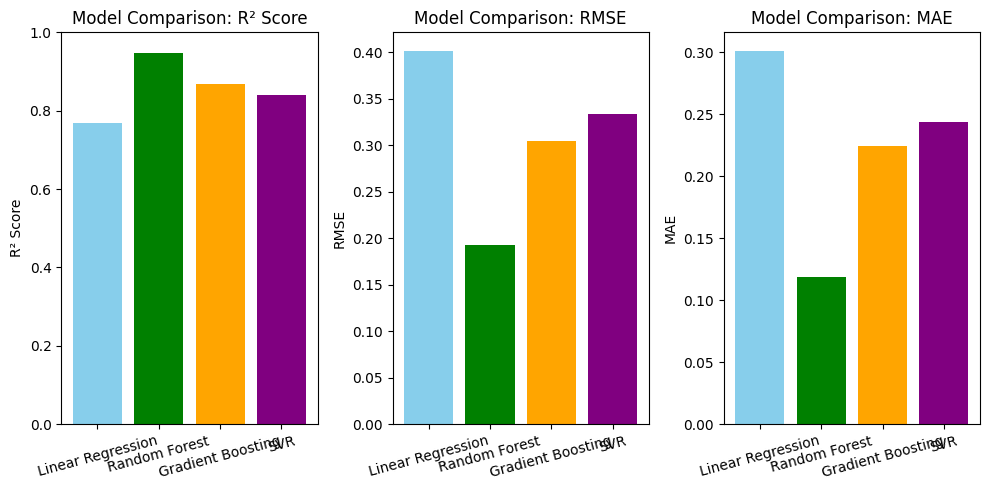

In [119]:
# Model performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [0.7698, 0.9468, 0.8674, 0.8406]
rmses = [0.4015, 0.1930, 0.3048, 0.3341]
MAE = [0.3012,0.1184,0.2249,0.2435]

# Plotting R² Score
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, r2_scores, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)

# Plotting RMSE
plt.subplot(1, 3, 2)
plt.bar(models, rmses, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=15)

# Plotting MAE
plt.subplot(1, 3, 3)
plt.bar(models, MAE, color=['skyblue', 'green', 'orange', 'purple'])
plt.title('Model Comparison: MAE')
plt.ylabel('MAE')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


### UNSUPERVISED(Market Segmentation)

In [120]:

print("Final dataframe shape for clustering:", df4.columns)

Final dataframe shape for clustering: Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type',
       'Size', 'Furnishing', 'Area', 'log_price', 'log_size'],
      dtype='object')


In [121]:
#droping Price,Location,size
df4 = df4.drop('Location',axis=1)
df4.columns


Index(['Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Size',
       'Furnishing', 'Area', 'log_price', 'log_size'],
      dtype='object')

In [122]:
df4 = df4.drop(['Size','Price','Furnishing'],axis=1)
df4.columns

Index(['Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Area', 'log_price',
       'log_size'],
      dtype='object')

In [123]:
#encode the categorial variable
#  (one-hot encoding)
df4 = pd.get_dummies(df4,columns =['Property Type','Area'],drop_first = True)
df4.head()

,Rooms,Bathrooms,Car Parks,log_price,log_size,Property Type_Bungalow,Property Type_Condominium,Property Type_Land,Property Type_Other,Property Type_Semi-detached House,...,Area_Sri Hartamas,Area_Sri Petaling,Area_Sungai Besi,Area_Sunway SPK,Area_Taman Desa,Area_Taman Melawati,Area_Taman Tun Dr Ismail,Area_Titiwangsa,Area_Wangsa Maju,Area_other
0,2,3,2,14.038655,7.197435,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6,7,0,15.732433,8.839422,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,4,2,13.845070,7.536897,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,3,2,13.710151,7.322510,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4,5,4,15.492607,8.881975,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### scaling the unsupervised data

In [124]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df4)


#### Find the Optimal (k)

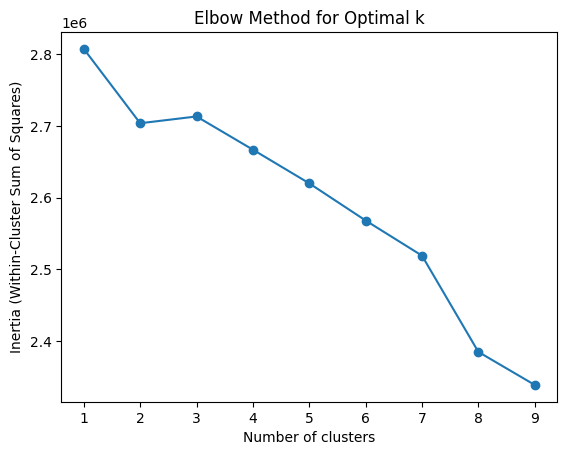

In [125]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


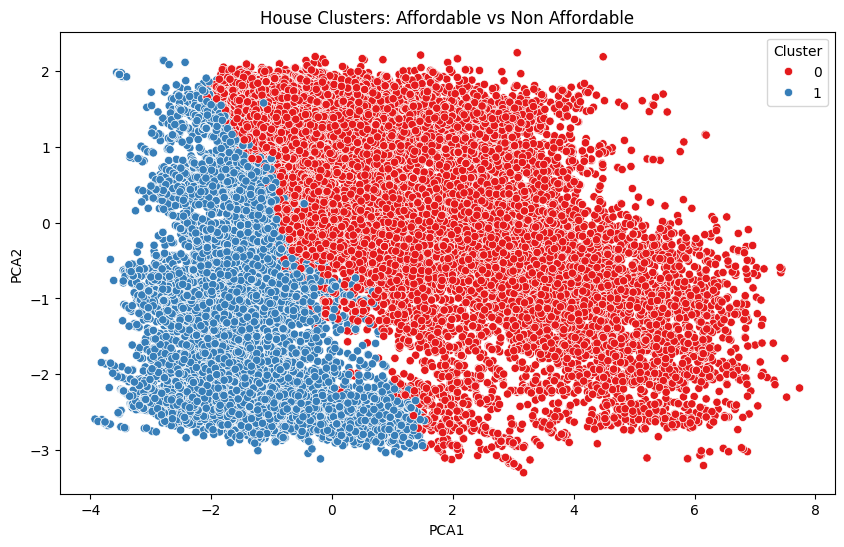

In [126]:
#using cluster k = 2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=2, random_state=42) 
clusters = kmeans.fit_predict(df_scaled)
# Add clusters to original dataframe
df4['Cluster'] = clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

df4['PCA1'] = pca_components[:, 0]
df4['PCA2'] = pca_components[:, 1]

# --- 8. Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data= df4
)
plt.title('House Clusters: Affordable vs Non Affordable')
plt.show()

In [127]:
cluster_summary = df4.groupby('Cluster').median(numeric_only=True)
print(cluster_summary)

         Rooms  Bathrooms  Car Parks  log_price  log_size  \
Cluster                                                     
0          3.0        3.0        2.0  13.972515  7.421178   
1          2.0        2.0        1.0  13.458837  6.855409   

         Property Type_Bungalow  Property Type_Condominium  \
Cluster                                                      
0                           0.0                        1.0   
1                           0.0                        0.0   

         Property Type_Land  Property Type_Other  \
Cluster                                            
0                       0.0                  0.0   
1                       0.0                  0.0   

         Property Type_Semi-detached House  ...  Area_Sungai Besi  \
Cluster                                     ...                     
0                                      0.0  ...               0.0   
1                                      0.0  ...               0.0   

         Area_Sunway

In [128]:
# Map cluster number to category name manually
cluster_labels = {
    0: 'Upper market',    # based on high avg price
    1: 'mid market',
    
}

df4['Cluster_Label'] = df4['Cluster'].map(cluster_labels)



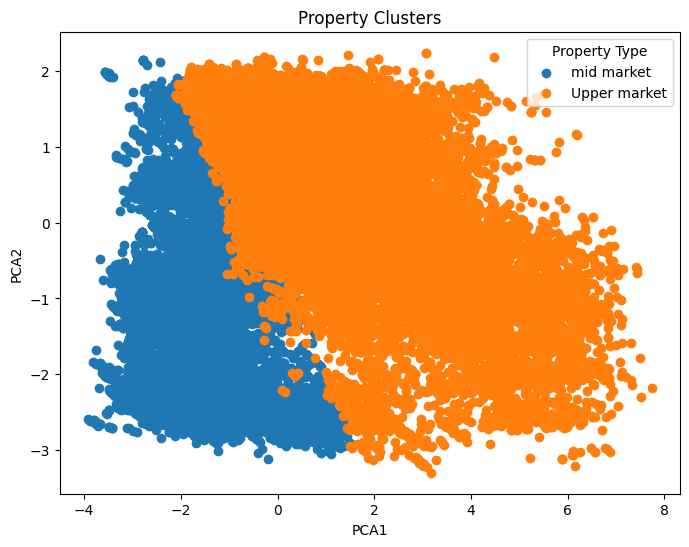

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Use categorical color based on Cluster_Label
for label in df4['Cluster_Label'].unique():
    subset = df4[df4['Cluster_Label'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=label)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Property Clusters')
plt.legend(title='Property Type')
plt.show()


In [130]:
#analyzing each segment
df4.groupby('Cluster_Label')[['log_price', 'log_size', 'Rooms', 'Bathrooms']].describe()


log_price                                                        \
                  count       mean       std        min        25%        50%   
Cluster_Label                                                                   
Upper market    28710.0  14.042057  0.825779  12.190101  13.353477  13.972515   
mid market      16568.0  13.554581  0.701152  11.561725  13.017005  13.458837   

                                    log_size            ... Rooms       \
                     75%        max    count      mean  ...   75%  max   
Cluster_Label                                           ...              
Upper market   14.661379  16.118096  28710.0  7.591621  ...   4.0  8.0   
mid market     13.997833  16.087637  16568.0  6.876579  ...   3.0  7.0   

              Bathrooms                                               
                  count      mean       std  min  25%  50%  75%  max  
Cluster_Label                                                         
Upper market    28710.0  3.362034  1.439105  1.0  2.0  3.0  4.0  7.0  
mid market      16568.0  1.944290  0.776985  1.0  1.0  2.0  2.0  6.0  

[2 rows x 32 columns]

In [ ]:


# Save the fitted KMeans clustering model
cluster_model = joblib.load("model/cluster.pkl")